In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle as pk

In [5]:
data = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

In [8]:
data.dropna(inplace=True)

In [9]:
def clean_review(review):
  str = ' '.join([word for word in review.split() if word.lower() not in (stopwords.words('english'))])
  return str

In [13]:
data = data.rename(columns={'review': 'text'})

data['text'] = data['text'].apply(clean_review)

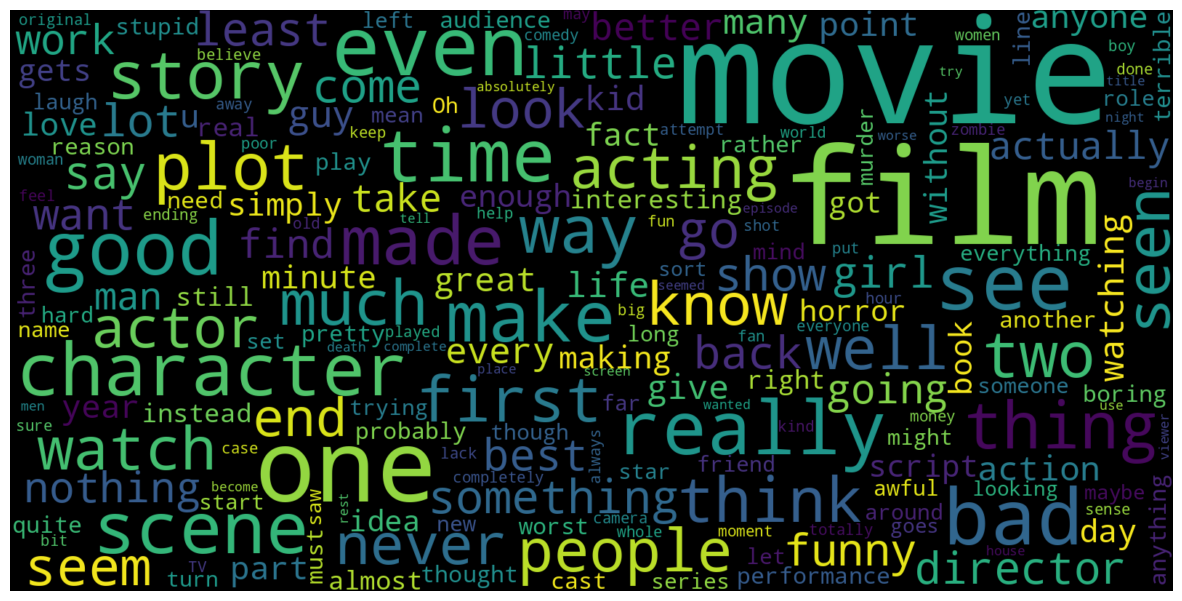

In [16]:
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'negative'].astype(str))
wordcloud = WordCloud(width=1600, height=800, max_font_size=200)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

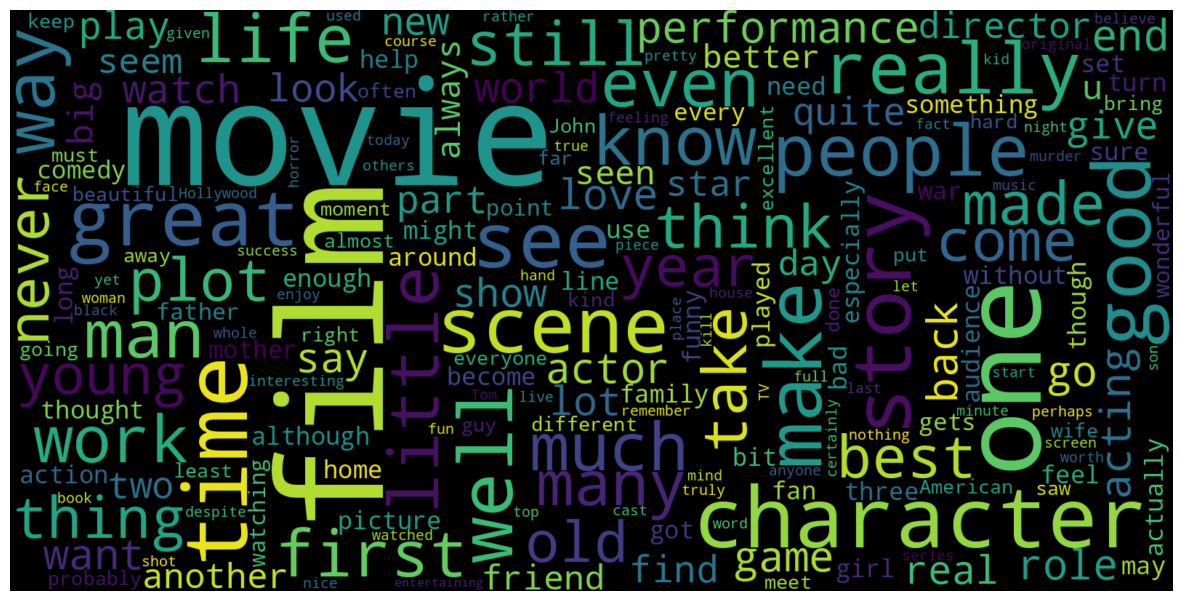

In [17]:
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'positive'].astype(str))
wordcloud = WordCloud(width=1600, height=800, max_font_size=200)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
cv = CountVectorizer(max_features=2500)
cv= TfidfVectorizer(max_features=2500)

In [26]:
review = cv.fit_transform(data['text']).toarray()

In [27]:
data['sentiment'] = data['sentiment'].replace({'positive': 1, 'negative': 0})

In [28]:
data['sentiment'].value_counts()

,count
sentiment,
0,263
1,237


In [31]:
model = LogisticRegression()

In [32]:
reviews_train, reviews_test, sentiment_train, sentiment_test = train_test_split(review, data['sentiment'], test_size=0.2)

In [33]:
model.fit(reviews_train, sentiment_train)

LogisticRegression()

In [34]:
predict = model.predict(reviews_test)

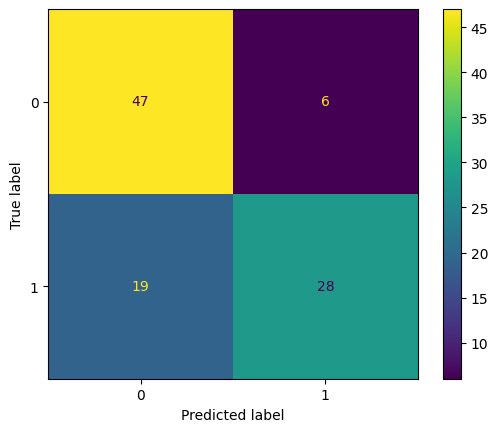

In [37]:
cm = confusion_matrix(sentiment_test, predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


In [39]:
pk.dump(model, open('model.pkl', 'wb'))
pk.dump(cv, open('cv.pkl', 'wb'))